## Описание проекта

Мы сотрудники интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Так же в соответствие с условиями мы помним, что данные за 2016 год могут быть не полными. Наша задача - отработать принцип работы с данными и разработать методику прогнозирования на будущий период, например 2017 год (по данным 2016 г.)  или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

В проекте выполнено: 
1. Подготовка данных - произведена замена названия столбцов датасета, произведено преобразование данных в нужные типы, обработаны пропуски данных. Посчитана суммарная продажа по каждой игре.
2. Проведен исследовательский анализ данных:
- Рассмотрено, сколько игр выпускалось в разные года, проанализирована актуальность этих данных для нашего исследования.
- Рассмотрено, как менялись продажи по платформам. Выбраны платформы с наибольшими суммарными продажами и построено распределение по годам. Определен, за какой характерный срок появляются новые и исчезают старые платформы. В соответствии с полученными выводами определена глубина актуальности данных, которые нам потребуются в дальнейших исследованиях и помогут построить прогноз на 2017 год.
- Определено, какие платформы лидируют по продажам в актуальном периоде, растут или падают.
- Построены график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
- Рассмотрено, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построены диаграммы рассеяния и посчитан коэффициент корреляцию между отзывами и продажами.
- Рассмотрено общее распределение игр по жанрам. 
3. Составлены портреты пользователя каждого региона, определены для каждого региона:
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?
4. Проверены 2 статистические гипотезы: 
- о равенстве средних пользовательских рейтингов платформ Xbox One и PC;
- о равенстве средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).



На всякий случай оставлю здесь описание исходных данных нашего датасета:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Открываем файл с данными и изучаем общую информацию


In [1]:
# Загружаем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Загружаем датафрейм
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Просматриваем 5 случайных строк и информацию о датафрейме
display(df.sample(5))
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6656,Anno 2205,PC,2015.0,Strategy,0.02,0.22,0.00,0.02,72.0,5.9,E10+
11972,Tom Clancy's Splinter Cell: Chaos Theory,DS,2005.0,Action,0.06,0.00,0.00,0.01,50.0,7,T
2462,Skate 2,PS3,2009.0,Sports,0.46,0.25,0.01,0.12,84.0,7.8,T
640,Call of Duty: Infinite Warfare,XOne,2016.0,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M
6844,Front Line,2600,1981.0,Action,0.22,0.01,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# для удобства сразу поправим названия столбцов, приведя их к строчной записи с помощью змеиного_языка:
df.columns = [x.lower() for x in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>
Так же можно использовать конструкцию: 
    
`df.columns = df.columns.str.lower()` 
    
</div>

In [5]:
# Посмотрим еще разной информации о наших данных

display (df[df['platform'] == 'GEN'].sample(5))

#присуствуют серии игры разных годов выпуска, но с одним названием. Учтем этот факт при обработки пропусков
display (df[df['name'] == 'Mortal Kombat'])

# есть одноименные записи об издании игр на разнех платформах, но без годов выпуска
display (df[df['name'] == 'Rock Band'])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
6451,Virtua Racing,GEN,1994.0,Racing,0.00,0.00,0.26,0.00,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
1453,Mortal Kombat 3,GEN,1994.0,Fighting,1.03,0.27,0.00,0.04,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
513,Mortal Kombat,PS3,2011.0,Fighting,1.98,0.53,0.0,0.34,84.0,8.4,M
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.0,0.09,NaN,NaN,NaN
791,Mortal Kombat,X360,2011.0,Fighting,1.63,0.31,0.0,0.16,86.0,8.3,M
3102,Mortal Kombat,PSV,2012.0,Fighting,0.42,0.13,0.0,0.10,85.0,7.8,M
15551,Mortal Kombat,PC,1994.0,Fighting,0.02,0.00,0.0,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


In [6]:
df.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


### Вывод

Что можно сказать на данном этапе?

Датасет содержит 10 колонок и 16715 строк.

Столбцы `platform`, `na_sales`, `eu_sales`, `jp_sales` не содержат пропусков, остальные требуют доработки и заполнения пропусков.

Так же столбцы требуется замена типа данных для ряда столбцов:
- `year_of_release` с float64 на int или datetime
- `critic_score` c float64 на int

Исходный датасет содержит в себе информацию о продаже **16713** игр на разных платформах, при этом только в датасете **11559** уникальных игровых тайтлов, то есть **30,8% нашего датасета - переиздание одних и тех же игр в разные года и на разных платформах.** К примеру, игра **Need for Speed: Most Wanted** фигурирует в наших данных 12 раз. Учтем этот факт при заполнении пропусков в различных столбцах.

Всего в датасете содержится информация о продаже игр на 31 игровой платформы, причем самая распространенная из всех - PS2, на ней было издано 2161 игра или почти 13% от нашего датасета.

Для 2424 игр (14,5% данных) в столбце `user_score` стоит значение **tbd**. tbd = to be determined или же "Подлежит определению".

В датасете самый распространенный рейтинг у игр -  **Е** («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. На долю игр с данным рейтингом приходится 3990 записей или 23,8% от всего датасета.

Приступаем к переработке данных.

In [7]:
# Проверка на явные дубликаты
df.duplicated().sum()

0

## Подготовка данных 

In [8]:
# Заполним пропуски в столбцах name и genre записью "unknown", так как не знаем что это была за игра, 
# но нам не хотелось бы терять данные об количестве проданных экземпляров

df['name'].fillna(value = 'unknown', inplace =True)
df['genre'].fillna(value = 'unknown', inplace =True)

<div class="alert alert-warning">
<h2> Комментарий ревьюера 🤓<a class="tocSkip"> </h2>

Здесь не вижу особого смысла, мы потеряем только 2 значения. Можно смело удалить, так как не оказывает влияние на анализ. Можешь посмотреть пропуски в процентном соотношении к общему количеству данных. Это даст тебе основания удалить малозначительную часть и сэкономить свое время.

</div>

In [9]:
# Для заполнения пропусков в данных напишем функцию, которая будет нам возвращать самое часто повоторяемое значение
# по сгурппированным данным

def series_mode(series): # Функция для замены пропусков с помощью метода .mode
    mode = series.mode()
    if len(mode) > 0:
        return mode[0]

In [10]:
# C помощью нашей функции заполним пропуски в необходимых столбцах исходя из названия игр. 
# Там где фунция не сработает по причине отсуствия подходящих входных данных, поставим заглушку из нетипичных для нашего датасета
# данных "-1" и учтем это при проведении дальнейшего анализа.

need_transform = ['rating','critic_score', 'user_score', 'year_of_release'] #список столбцов под трансформацию

for index in need_transform:                                                # Как сказал бы Ю.А.Гагарин: "Поехали!"
    transform = df.groupby('name')[index].transform(series_mode)
    df[index] = df[index].fillna(transform)
    df[index] = df[index].fillna(-1)
    
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8602,Our House,DS,2009.0,Strategy,0.15,0.00,0.0,0.01,-1.0,tbd,E
2548,Battle of Giants: Dinosaurs,DS,2008.0,Strategy,0.37,0.35,0.0,0.09,-1.0,7.2,E
5606,Rayman 2: The Great Escape,PS,2000.0,Platform,0.18,0.12,0.0,0.02,-1.0,-1,-1
4543,SEGA Classics Collection,PS2,2005.0,Misc,0.21,0.16,0.0,0.05,46.0,6.7,T
1825,Call Of Duty 2: Big Red One,XB,2005.0,Shooter,0.66,0.40,0.0,0.05,78.0,5.1,T


Такую замену считаю самой корректной, поэтому на ней и остановился в своем проекте.

Были варианты:
    
    1) Сделать трансформацию по моде значений, сгруппированных по столбцу Имя + использовать заглушки
    
    2) Трансформация по моде значений, сгруппированных по столбцу Имя + трансформация по моде значений, сгруппированных по полю Жанр
    
    3) Трансформация по значениям, сгруппированным по нескольким столбцам (жанр + платформа, жанр + платформа + год выпуска) с применением средней/медианы/моды
    
    4) Использовать заглушки для всех пропущенных данных
    
    5) Удалить строки с пропусками

Последний вариант сразу отбрасываем, т.к. лишимся 51,3% всего датасета.
    
Предпоследний вариант чуть получше, но только тем, что у нас останется чуть больше данных для анализа, а  самая большая группа данных у нас становится наши заглушки - это неправильно.
    
Варианты 2 и 3 на первый взгляд кажутся довольно сбалансированными, т.к. позволяют во первых заполнить все пропуски, во вторых вроде бы не сильно исказят нашу выборку. Но это так только на первый взгляд. Дело в том, что группируя датасет по жанрам и заполняя пропуски по факту все таки пойдут серьёзные отклонения в итоговом датасете. В первую очередь потому, что внутри самих жанров идет большой разброс по характеристикам играм. Ниже небольшой пример из жанров Action и Fighting. Жанры одни и те же, а рейтинги ESRB, оценки совсем разные. Это логично, т.к. жанр - слишком большое понятие, объединяющие в себе в первую очередь основную механику 	игры, но никак ее не ограничивающие по большому счету. Поэтому и существуют такие игры как драки с рекомендованным игрокам возрастом от 10 лет, так и наоборот, экшены с очень высоким жёстким содержанием.
    
И таким образом я пришел к первому варианту обработки пропуском - просто замена недостающих данных исходя из имен тайтлов, т.е. если по конкретному релизу не хватает данных, мы просто берем их из одноименных строк (релизам игры  на других платформах) + используем заглушки. На мой взгляд это самый щедящий вариант обработки пропусков в данном датасете. Остается как ты заметила не забыть учесть заглушки, но с этим у меня в проекте проблем вроде не возникло.

In [11]:
df.iloc[[7262, 3102, 3070, 5221]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7262,Naruto Shippuden: Ultimate Ninja Storm Revolution,X360,2014.0,Fighting,0.14,0.06,0.00,0.02,62.0,7.3,T
3102,Mortal Kombat,PSV,2012.0,Fighting,0.42,0.13,0.00,0.10,85.0,7.8,M
3070,Lollipop Chainsaw,PS3,2012.0,Action,0.27,0.20,0.11,0.08,67.0,7.1,M
5221,Spider-Man: Shattered Dimensions,X360,2010.0,Action,0.24,0.08,0.00,0.03,76.0,7.6,T


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
# Все таки заглушка "-1" не совсем подходит для всех столбцов. В дальнейшем при проведении работ по построению графиков я пришел 
# к выводу, что в столбцах "year_of_release" в качестве заглушки больше подходят данные о годе, не вошедшим в период датасета,
# например 1970 г. В столбце "rating" в пропусках более уместна надпись "unknown". Так же на этом этапе заменим "tbd" на 
# "unknown" для однородности данных.

df['user_score'].replace(to_replace = 'tbd', value = -1, inplace = True)
df['year_of_release'].replace(to_replace = -1, value = 1970, inplace = True)
df['rating'].replace(to_replace = -1, value = 'unknown', inplace = True)

df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16015,Mark McMorris Infinite Air,XOne,2016.0,Sports,0.01,0.00,0.0,0.00,49.0,7.1,T
11924,SpongeBob's Truth or Square,PSP,2009.0,Action,0.02,0.04,0.0,0.01,-1.0,-1,E
8376,World Tour Soccer 2006,PS2,2004.0,Sports,0.08,0.06,0.0,0.02,56.0,6,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.0,0.01,94.0,7.7,E
7992,.hack//Quarantine Part 4: The Final Chapter,PS2,2003.0,Role-Playing,0.09,0.07,0.0,0.02,-1.0,-1,unknown


In [14]:
# исправим типы данных по столбцам

df['critic_score'] = df['critic_score'].astype('int64')
df['year_of_release'] = df['year_of_release'].astype('int64', errors = 'ignore')
df['user_score'] = df['user_score'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [15]:
# добавим в наш датасет столбец с данными о сумарной продаже игр по регионам и просумируем их
df['total_sales'] = df['na_sales'] +df['eu_sales']+df['jp_sales']+ df['other_sales']

print("Общая сумма продаж игр составила", df['total_sales'].sum(), "млн. экземпляров")

Общая сумма продаж игр составила 8915.71 млн. экземпляров


### Вывод

Итак, на данном этапе мы навели порядок в данных, подготовив их к дальнейшему анализу с помощью описательной статистики и графиков.

Навели порядок в типах данных, убрав где нам не требуются числа после запятой и назначив для столбца `user_score` подходящий ему тип данных.

Кроме того, на данном этапе расчитаны суммарные продажи во всех регионах по 1 игре. Данные записаны их в отдельный столбец в нашем датасете.  Общая сумма продаж игр в нашем датасете по всем регионам составила **8915.71** млн. экземпляров. Впечатляет!

## Исследовательский анализ данных

<AxesSubplot:xlabel='count', ylabel='year_of_release'>

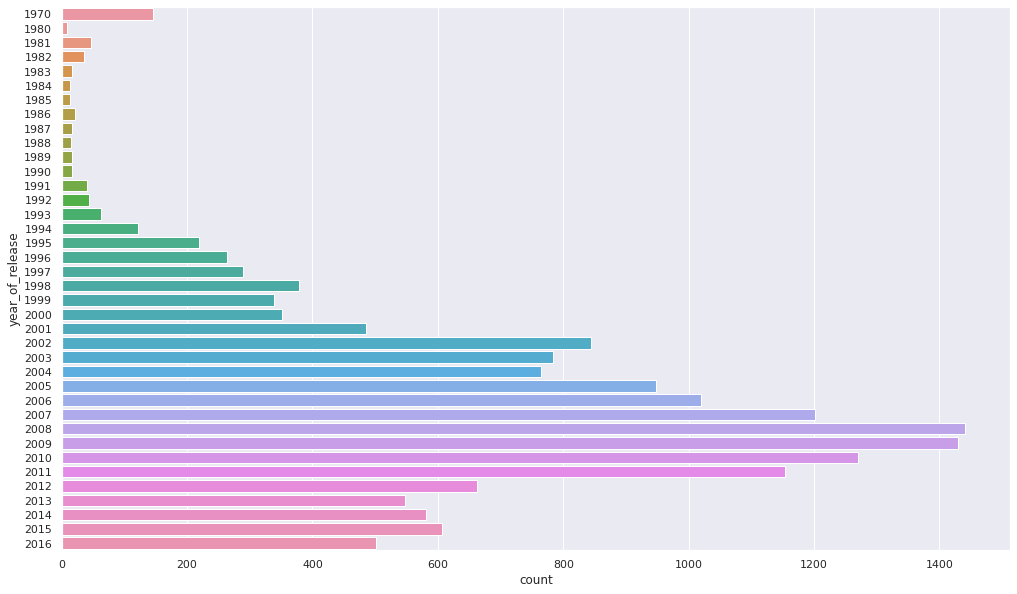

In [16]:
# посмотрим, сколько игр выпускалось в разные годы и сделаем вывод важны ли данные за все периоды?

# display(df.pivot_table(index='year_of_release', aggfunc='count'))

sns.set(rc={'figure.figsize':(17,10)})
sns.countplot(data = df, y= 'year_of_release') 

Напомню, что 1970 г. на графике соответствует играм, для которых не удалось  заполнить пропуски данных о годе издания. Всего таких строк у нас собралось 146 шт. или 0,9%. 

Из графика видно, что число выпущенных игр в период с 1980 по 1990 гг. было минимальным и не доходило до 50 изданий в год, а как правило находилось на уровне около 20 игр в год. 

С 1991 начинает ежегодный рост числа публикуемых игр, в 1994 году вышло более 100 шт, а в 1995 уже более 200, в 2001 почти 500, а в 2002 - уже более 800! 

Рост числа выпущенных игр находился на очень высоком уровне и сохранялся вплоть до 2008 - 2009  годов: в этот период индустрия игр выпустила около 1450 игр ежегодно.

С 2010 года наблюдалось снижение числа выпущенных игр, которое подверглось незначительной коррекции в период 2014-2015 гг:
* 2010 - 1270
* 2011 - 1153
* 2012 - 662
* 2013 - 548
* 2014 - 581
* 2015 - 606	
* 2016 - 502 (данные могут быть не полные)

По данному графику можно сделать  предположение, что с 2010 года потребители постепенно начали отказываться от компьютерных игр в пользу других платформ, например **мобильных игр**. Было бы весьма интеренсно проанализировать аналогичные данные еще и в разрезе мобильных игр.

По графику можно точно сказать, что не все данные в нашем датасете будут актуальны для нашего анализа: до 1994 года ежегодно выпускалось слишком мало игр, можно взять данную отметку как отправную точку в дальнейшем определении актуальности глубины данных.

      platform
mean  GB          2.606735
      NES         2.561735
      GEN         1.061034
      SNES        0.836987
      PS4         0.801378
      X360        0.769746
      2600        0.729173
      PS3         0.705973
      Wii         0.687508
      N64         0.685517
Name: All, dtype: float64

<AxesSubplot:title={'center':'График средних значений продаж по платформам за все время'}, xlabel='year_of_release'>

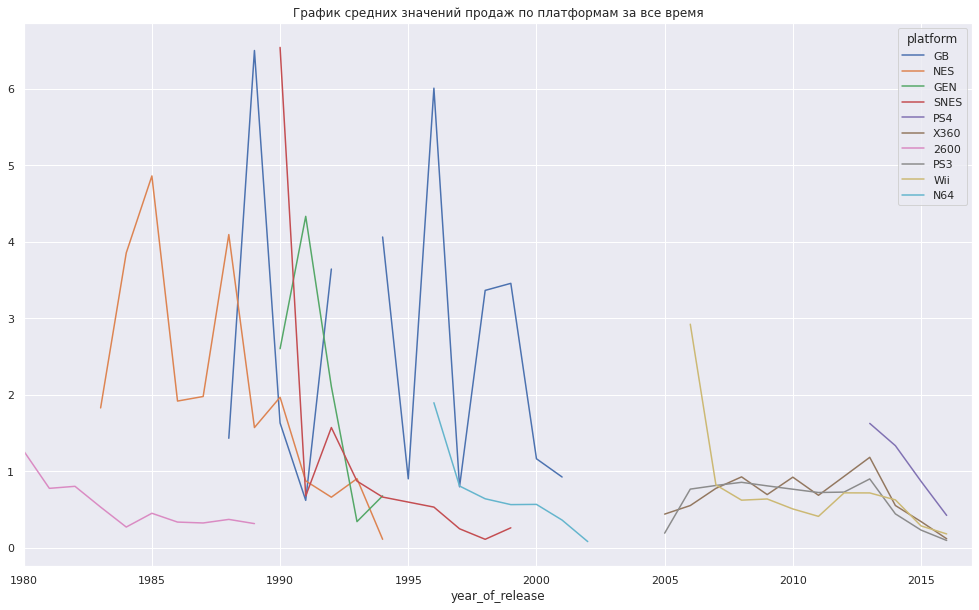

In [17]:
# Рассмотрим среднее значение продаж игр на 1 игру за все время и построим график средних значений продаж по платформам-лидерам
display(df.pivot_table(index='year_of_release', values='total_sales', 
                       columns='platform', aggfunc=['mean'], margins = True).loc['All'].sort_values(ascending=False).head(10))

df.pivot_table(index='year_of_release', values='total_sales',
               columns='platform', aggfunc='mean'
              )[['GB', 'NES', 'GEN', 'SNES', 'PS4', 'X360', 
                 '2600', 'PS3', 'Wii', 'N64']].plot(xlim=(1980, 2017),title = 'График средних значений продаж по платформам за все время')


Удивительно, но выходит что до 2000-х индустрия видеоигр действительно умела выдавать супер-хиты, среднегодовые продажи на 1 тайтл по платформам GB и SNES достигали отметок более 6 млн. экземляров. Современные платформы в период с 2010 по 2016 гг. не могут похвастаться такими результатами.

platform
All     8915.71
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: All, dtype: float64

<AxesSubplot:title={'center':'Сумма проданных игр по платформам за период 1993-2016 гг.'}, xlabel='year_of_release'>

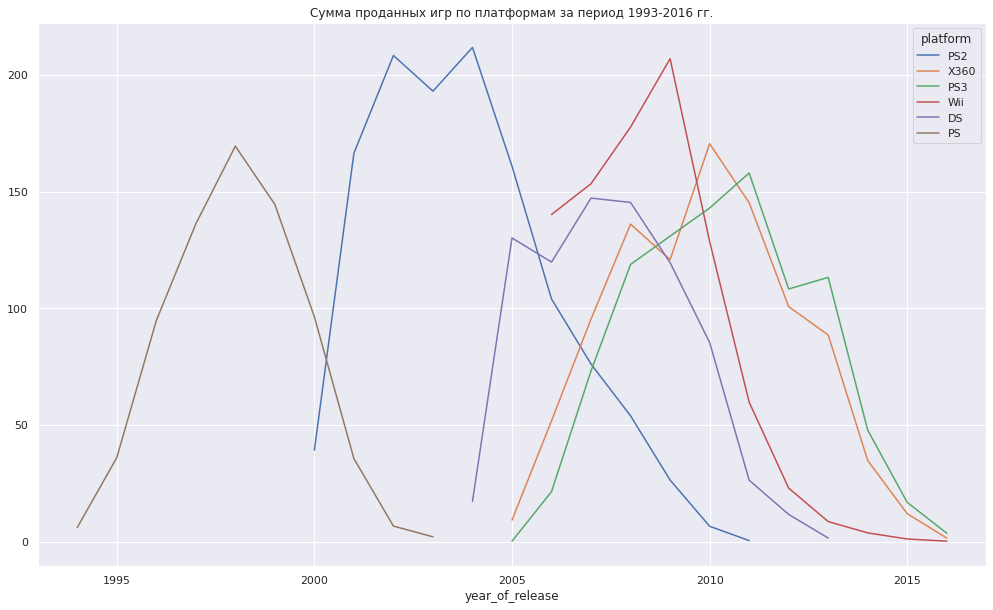

In [18]:
# Рассмотрим данные о сумме продаж игр по годам и отразим их на линейном графике

display(df.pivot_table(index='year_of_release', values='total_sales', 
                       columns='platform', aggfunc='sum', margins = True).loc['All'].sort_values(ascending=False).head(7))
df.pivot_table(
    index='year_of_release', values='total_sales', 
    columns='platform', aggfunc='sum'
)[['PS2', 'X360', 'PS3','Wii', 'DS', 'PS']].plot(
    xlim = (1993, 2017), title = 'Сумма проданных игр по платформам за период 1993-2016 гг.')

Платформа-рекордсмен  по сумме проданных копий игр - PS2, 1255,77 млн копий. В топе по продажам из 6 представленных консолей 3 произведены компанией Sony, 2 - компанией Nintendo и 1 от компании Microsoft. На этом графике хорошо видно, что **период расцвета и падения каждой из платформ умещается в период 5-7 лет.** Во многом это объясняется сменяемостью поколений платформ, без данного фактора возможно платформа могла просуществовать больший срок. Кстати этот факт частично подтверждается и по предыдущему графику со значениями средних продаж по платформам, иначе как объяснить стабильно высокий спрос на игры платформы NES или GB в течение 10 лет с момента выхода платформ? Только отсутствием перехода к новым поколениям платформ. 

platform
All     16715.0
PS2      2161.0
DS       2151.0
PS3      1331.0
Wii      1320.0
X360     1262.0
PSP      1209.0
PS       1197.0
PC        974.0
XB        824.0
Name: All, dtype: float64

<AxesSubplot:title={'center':'Количество выпущенных тайтлов игр по платформам за период 1993-2016 гг.'}, xlabel='year_of_release'>

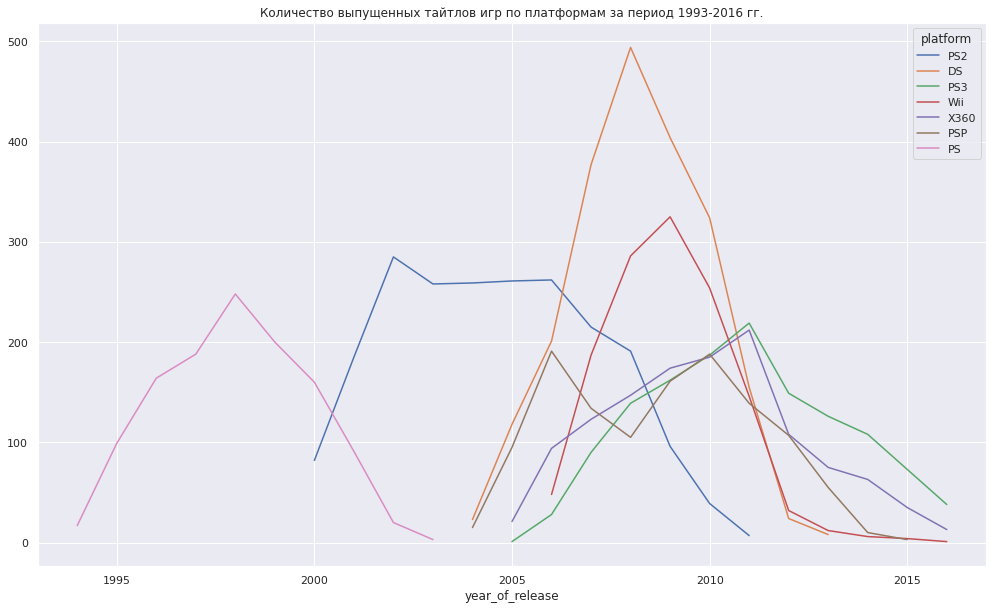

In [19]:
# Не менее интересная метрика - количество выпущенных тайтлов за период. Посчитаем количество выпущенных тайтлов по латформам
# и так же отобразим их на графике.

display(df.pivot_table(index='year_of_release', values='total_sales', 
                       columns='platform', aggfunc='count', margins = True).loc['All'].sort_values(ascending=False).head(10))
df.pivot_table(
    index='year_of_release', values='total_sales', 
    columns='platform', aggfunc='count'
)[['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS']].plot(xlim = (1993, 2017), title = 'Количество выпущенных тайтлов игр по платформам за период 1993-2016 гг.')

А вот и секрет лидерства платформ семейства Play Station - ошеломляющие количество выпущенных наименований игр, которое обеспечивает компании Сони по сумме проданных игр за все периоды. Данный график так же подтверждает предыдущий вывод о сроке появления новых и исчезновении старых платформ - платформе находится в топе по популярности у издателей игр в течении 5-7 лет, ну а общий срок актуальности платформы от момента выхода на рынок  до ухода с него составляет около 10 лет.

In [20]:
## Одна из задач нашего анализа - отработать принцип работы с данными и разработать методику прогнозирования
# на будущий период, например 2017 год. Исходя из ранее определенного периода расцвета платформ - 5 лет, посмотрим какие
# платформы имеют актуальность в период с 2013 по 2016 год и смогут послужить базой для дальнейших рекламных компаний.

df1 = df.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
df1 = df1.loc[2013:2016].dropna(axis = 1)
df1

 

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2013,56.57,13.01,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


Видим, что по состоянию на 2016 год (даже не смотря на не полность данных по нему) на рынке представлены только 9 платформ из 31. 
Сумма продаж игр по платформам предыдущего покаления - PS3, Wii, X360 - сильно снизилась по сравнению с предыщими годами. При наличии в датасете nextgen данных платформ считаю целесообразно не принимать предыдущие покаления приставок к дальнейшему  анализу. Таким образом можно сформировать новый актуальный датасет, исходя из периода с 2013 по 2016 год и платформ `3DS`,	`PC`,	`PS4`,	`PSV`,	`WiiU`,	`XOne`

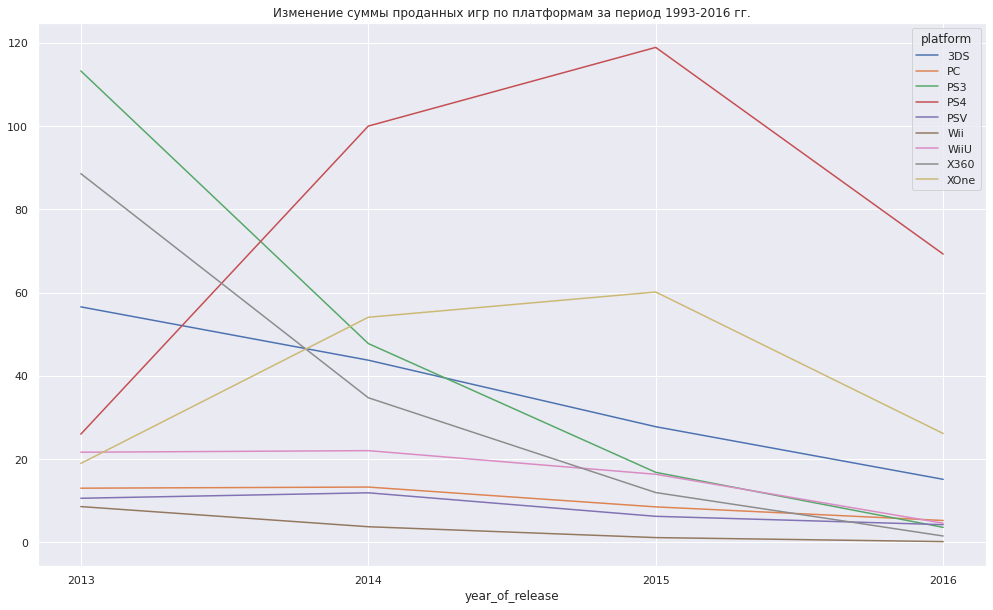

In [21]:
df1.plot(title = 'Изменение суммы проданных игр по платформам за период 1993-2016 гг.')
plt.xticks(np.arange(2013,2017,1))
plt.show()

In [22]:
df_actual = df[df['platform'].isin(['3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne'])]
df_actual = df_actual[df_actual['year_of_release']>=2013]
df_actual.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14700,Kenka Bancho Otome,PSV,2016,Action,0.00,0.00,0.03,0.00,-1,-1.0,unknown,0.03
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,unknown,7.98
3769,The LEGO Movie Videogame,XOne,2014,Action,0.35,0.13,0.00,0.05,69,6.9,E10+,0.53
16135,Super Stardust Ultra VR,PS4,2016,Shooter,0.00,0.01,0.00,0.00,66,6.2,E10+,0.01
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


(0.0, 5.5)

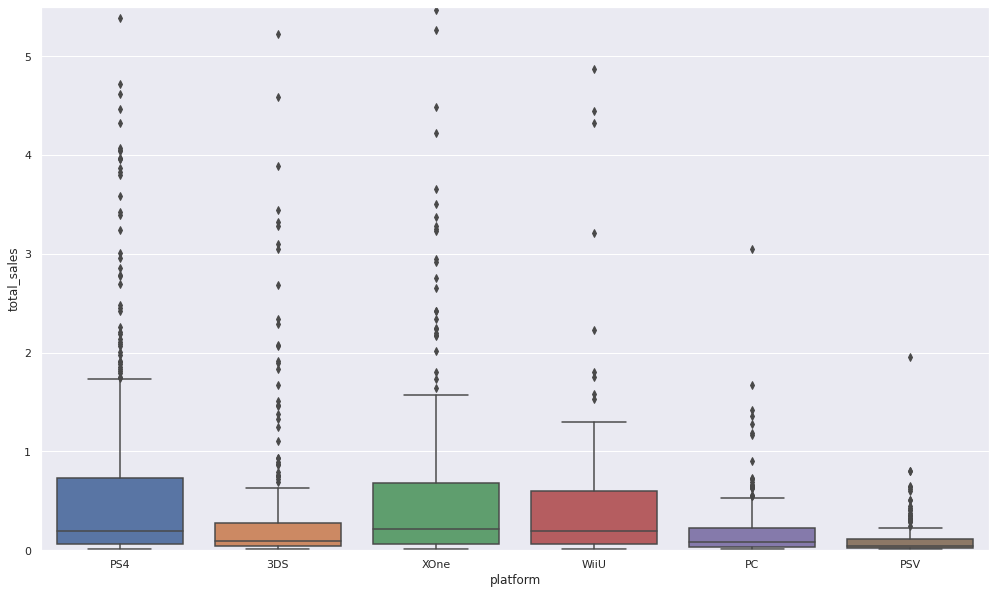

In [23]:
# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период
sns.boxplot(data=df_actual, x='platform', y='total_sales')
plt.ylim (0, 5.5) # В графике большое число выбросов, отфильтруем их при построении графика

График «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период без ограничений:

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

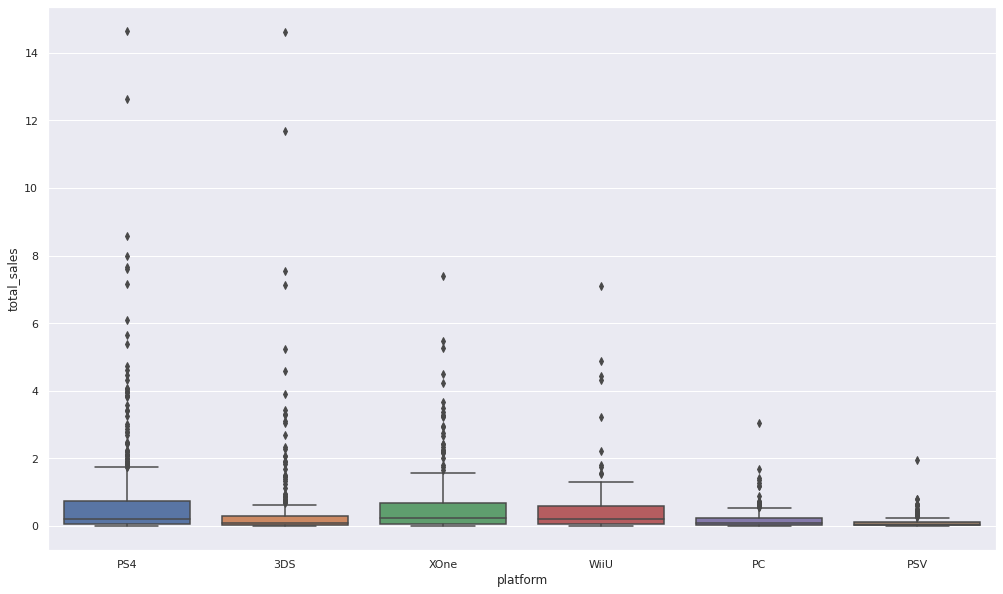

In [24]:
sns.boxplot(data=df_actual, x='platform', y='total_sales')

Видим весьма интересную картину:
- PS4 вновь лидер по средним значениям общих продаж. Строение ящика и его усов говорит нам, что в среднем за актуальный период было реализовано 0,2 млн копий игр, при этом 50% от всех реализованных игр на данной платформе имели продажи от 0,1 млн. копий до 0,75 млн. проданных копий. Ну а 25% от изданных за актуальный период игр имели продажи от 0,75 млн. до 1,75 млн. копий, что на мой взгляд заслуживает уважения. Так же примечательно рекордное количество выбросов на графике, что говорит нам о том, что данная платформа богата на бестселлеры.
- Второе место по размеру статистически значимой выборки и с "ящиком" чуть меньшего размера - платформа XOne. Медианное значение чуть больше по сравнению с PS4, где-то ближе к 0,25 млн. проданных копий. Так же можно сказать что половина (с 1 по 3 квантиль) от изданных на данной платформе игр имели объем продаж от 0,1 до 0,7 млн. проданных копий. "Среднестатистический" успех (конец максимального уса) выглядит на данной платформе как продажа 1,6 млн. экземпляров игр по 1 тайтлу.
- Третье место по разбросу результатов внутри актуального датасета досталось WiiU. Статистически, игры на данной платформе продавались чуть с меньшим разбросом результатов по продаже, однако и сами продажи были несколько ниже. Медианное значение очень близко к данным PS4 и  XOne
- Четвертое и пятое место по размерам максимальной статистической выборки и медианы продаж занимают платформы 3DS и PC. В среднем игры на данных платформах продавались с результатом в 0,125 млн. копий игры. Максимальное значение статистически значимой выборки у 3DS по сравнению с PC чуть выше.
- Шестое место по размеру статистически значимой выборки и самым маленьким "ящиком" у платформы PSV. В среднем, по данной платформе лучшие результаты продаж игр находятся на отметке в 0,25 млн. проданных копий, ну а в среднем продается 0,1 млн. копия игр.

Какой общий вывод можно сделать? По состоянию на 2016 год на рынке присутствуют 3 платформы с очень схожей в общей массе результатами продаж игр PS4, XOne, WiiU. Но ни одна из платформ-лидеров не показала существенного отрыва в средней продаже игр, т.е. какой-то супер-фоворит с реализацией игр на уровне 2 млн.+ копий проданных игр в среднем отсутствует, все более-менее ровно. 

У каждой платформы есть так называемые бестселлеры - игры, результаты продаж которых намного превышают остальные игры в десятки и даже сотни раз доходят 15+ проданных копий игры, такие случаи зафиксированы у платформ PS4 и 3DS. Но как правило даже у бестселлеров есть свои правила - как правило продажа игр-бестселлеров на платформе PS4 останавливалась на уровне 4 млн. проданных копий, у  3DS - 2,5 млн проданных копий, XOne - 3,6 млн. копий. По остальным платформам "выбросы" в продаже игр имеют более разовый характер.


,total_sales,critic_score,user_score
count,918.000000,918.000000,918.000000
mean,0.611471,72.791939,6.776688
std,1.120355,12.487781,1.540992
min,0.010000,19.000000,1.400000
25%,0.070000,67.000000,6.000000
50%,0.200000,74.000000,7.100000
75%,0.610000,81.000000,7.900000
max,12.620000,97.000000,9.300000


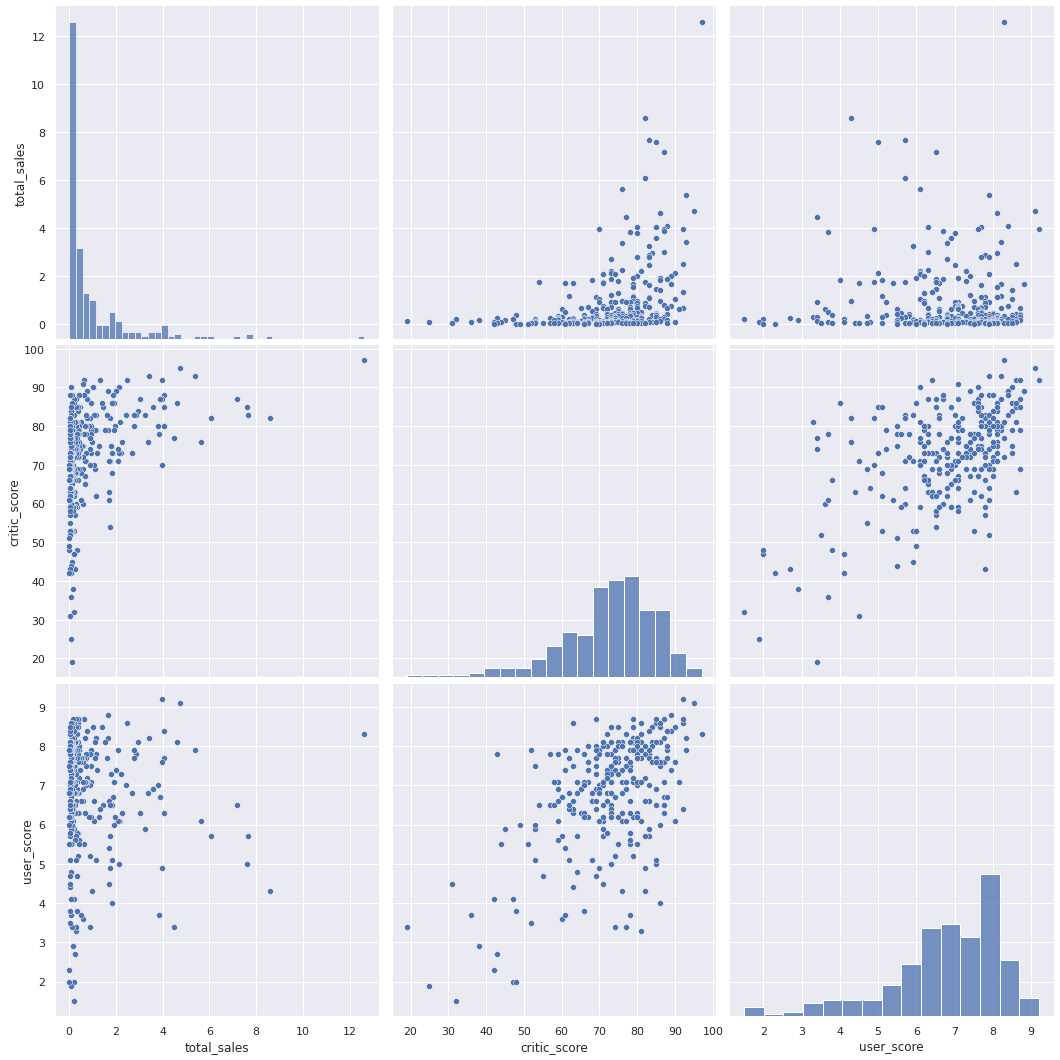

In [25]:
# Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
# Построим диаграмму рассеяния и расчитаем корреляцию между отзывами и продажами. 

# Учтем наличие данных-заглушек у столбцов critic_score и user_score, сформируем новый датасет для построения pairplot
df_score_analysis = df_actual.loc[(df_actual['critic_score'] >= 0)&(df_actual['user_score'] >= 0),
                                  ['platform','genre', 'total_sales', 'critic_score','user_score']]  

display (df_score_analysis.describe())

# Постром pairplot для платформы PS4
sns.pairplot(df_score_analysis[df_score_analysis['platform'] == 'PS4'], kind = 'scatter', height=5, aspect=1)
plt.show()

Text(0.5, 1.0, 'Тепловая карта корреляции для PS4')

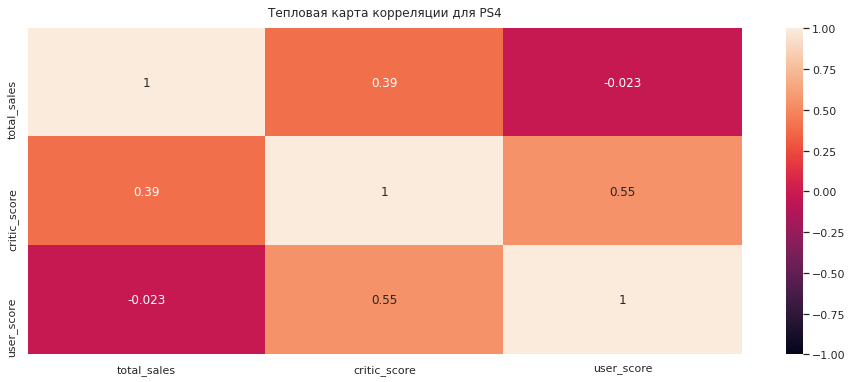

In [26]:
# Построим тепловую карту коэффицента корееляции
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_score_analysis[df_score_analysis['platform'] == 'PS4'].corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Тепловая карта корреляции для PS4', fontdict={'fontsize':12}, pad=12)

Какой вывод можно сделать о результатах расчета коффициента корреляции и диаграмм рассеивания для PS4?
Удивительно,  оценки пользователей практически не имели влияния (а даже и незначительное отрицательное влияние) на общие продажи игр, когда в тоже время оценки критиков оказывали бОльшее по сравнению с оценками пользователей влияние на продажи игры. Но и все равно, даже оценки критиков имели слабую корреляцию с общим результатом.
Поэтому:
1. ..А судьи кто? (с) Грибоедов
2. Пользователь всегда проголусует покупкой, не зависимо от того, какую оценку поставили другие пользователи или критики
3. Успех продажи игр кроется не в оценках критиках, а в других количественных или качественных величинах. Что это? Может год выпуска движка игры? Может это размер рекламного бюджета? Колчество персонажей? А может это имя студии, которая выпустила игру. В рамках этого датасета мы не сможем ответить на эти вопросы

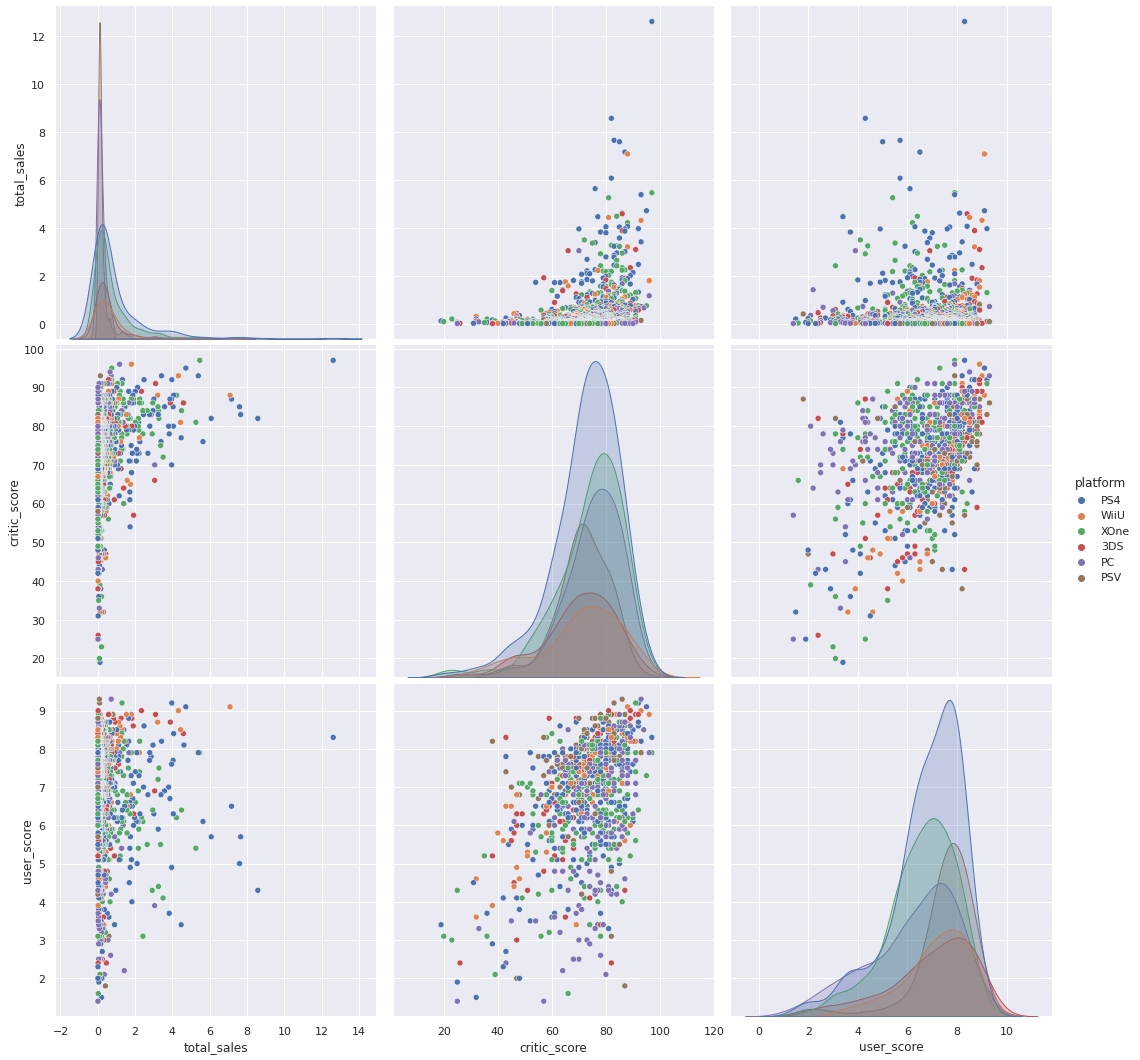

In [27]:
# Соотнесем предыдущие выводы с продажами по остальным платформам

sns.pairplot(df_score_analysis, kind = 'scatter', hue = 'platform', height=5, aspect=1)


Text(0.5, 1.0, 'Тепловая карта корреляции всех актуальных платформ')

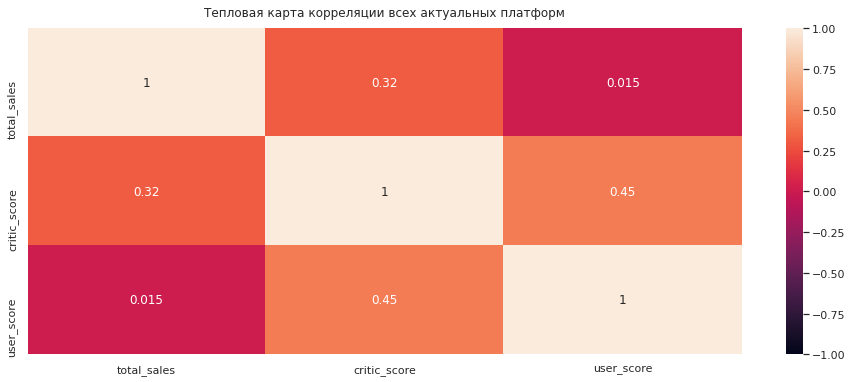

In [28]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_score_analysis.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Тепловая карта корреляции всех актуальных платформ', fontdict={'fontsize':12}, pad=12)

Видим, что картина на графике координально не изменилась, все так же близкое к 0,1 по общим результатам продаж по остальным платформам, координальных отличий в взаимосвязи оценок критиков и пользователей по остальным платформам нет. Можно так же сказать, что для всех платформ в актуальном периоде нет сильной взаимосвязи оценок и количеством проданных игр. 

In [29]:
df_non_score = df_actual.loc[(df_actual['critic_score'] < 0) & (df_actual['user_score'] < 0),
                                  ['platform','genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]  
display (df_non_score.pivot_table(index='genre', aggfunc=['sum'], margins = True))
display (df_non_score.pivot_table(index='platform', aggfunc=['sum'], margins = True))


sum                              
             eu_sales jp_sales na_sales other_sales
genre                                              
Action           5.47    18.51     5.91        1.71
Adventure        1.42     3.44     1.59        0.47
Fighting         2.50     3.89     6.12        0.93
Misc             5.19     5.44     4.90        1.50
Platform         1.14     0.13     0.94        0.32
Puzzle           0.12     0.63     0.12        0.02
Racing           2.35     0.15     0.91        0.51
Role-Playing    12.25    32.66    16.67        2.93
Shooter         14.56     0.63    16.96        5.06
Simulation       3.65     2.40     1.57        0.44
Sports           0.30     1.59     0.43        0.09
Strategy         0.19     1.06     0.16        0.02
All             49.14    70.53    56.28       14.00

sum                              
         eu_sales jp_sales na_sales other_sales
platform                                       
3DS         16.81    51.51    20.92        3.43
PC           2.74     0.00     0.67        0.22
PS4         19.63     5.62    17.28        7.28
PSV          1.03    10.98     0.84        0.54
WiiU         2.27     2.38     4.42        0.67
XOne         6.66     0.04    12.15        1.86
All         49.14    70.53    56.28       14.00

<AxesSubplot:title={'center':'Распределение игр без рейтинга по платформам в период 2013-2016 гг.'}, xlabel='platform'>

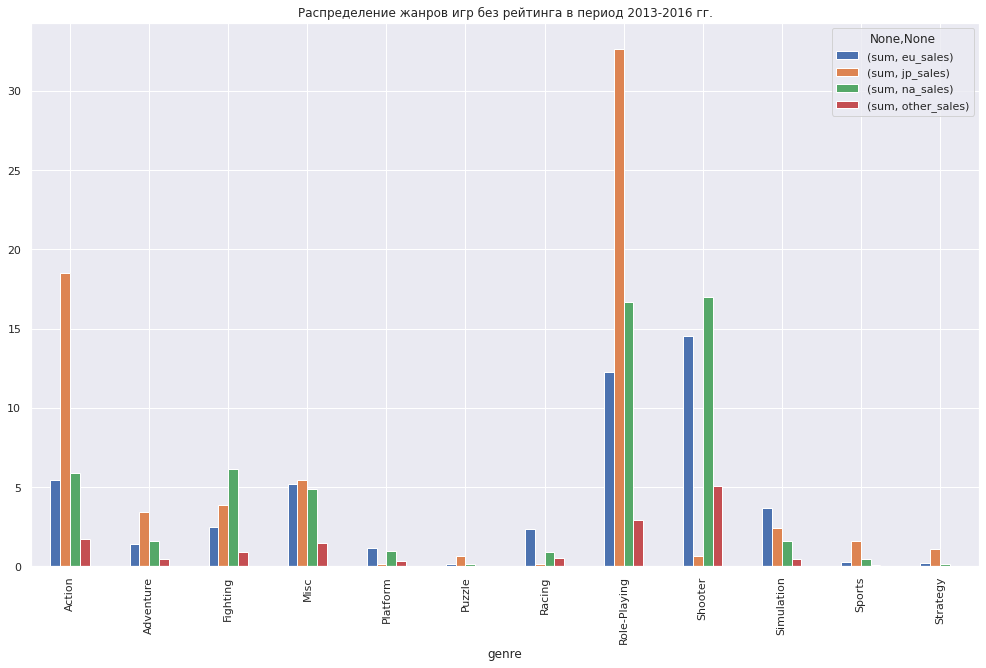

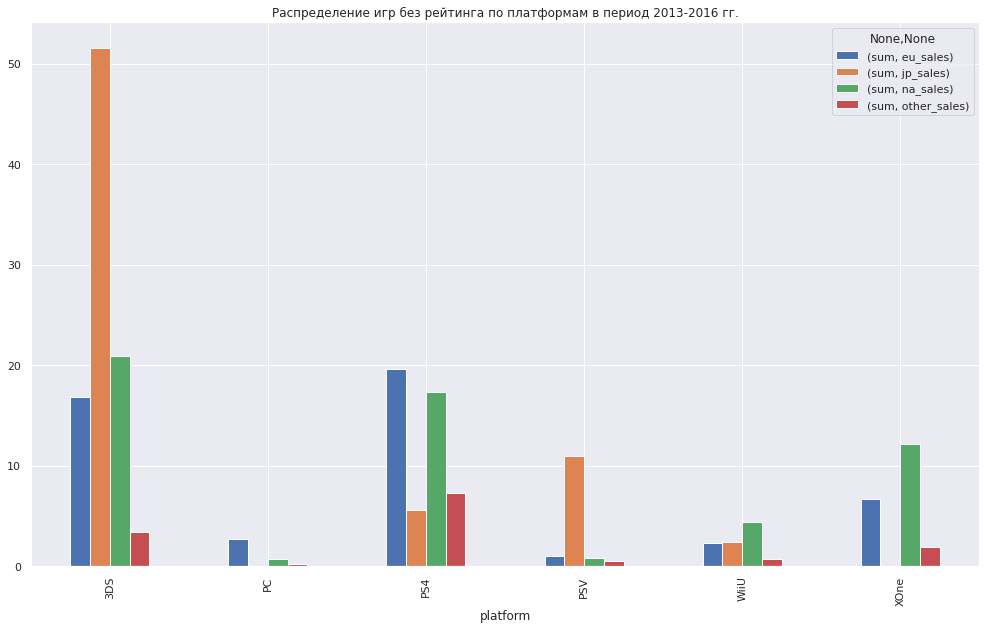

In [30]:
df_non_score.pivot_table(index='genre', aggfunc=['sum']).reset_index().plot(kind = 'bar', x='genre', title = 'Распределение жанров игр без рейтинга в период 2013-2016 гг.')
df_non_score.pivot_table(index='platform', aggfunc=['sum']).reset_index().plot(kind = 'bar', x='platform', title = 'Распределение игр без рейтинга по платформам в период 2013-2016 гг.')

  
Всего в датасете 642 строки с даннми о играх, для которых рейтинг пользователей и критиков не был определен. Проведенный анализ показывает, что доля продаж таких игр максимальна на рынке Японии, 70,53 млн. проданных экземпляров. Далее идет рынок Северной Америки и Европы 56,28 и 49,14 млн. копий соответсвенно.

Среди игр, не получивших оценки пользователй и критиков, наибольшее число вышло в жанрах Role-Playing, Shooter, Action. 

Небольшое удивление вызывает тот факт, что основной платформой, на которой выходили игры без оценок, стала с большим отрывом 3DS (за счет рынка Японии), за ней уже идут с приличным отставанием PS4 и XOne.


In [31]:
# Посмотрим на общее распределение игр по жанрам. 

df_actual.pivot_table(index='genre', values='total_sales', aggfunc=['count','sum', 'mean']
                     ).reset_index().sort_values (by=( 'mean', 'total_sales'), ascending=False)

,genre,count,sum,mean
,,total_sales,total_sales,total_sales
8,Shooter,122,165.71,1.358279
10,Sports,127,90.67,0.713937
4,Platform,55,34.22,0.622182
2,Fighting,48,26.69,0.556042
7,Role-Playing,228,123.94,0.543596
6,Racing,60,30.36,0.506000
9,Simulation,50,19.81,0.396200
0,Action,571,199.81,0.349930
3,Misc,112,34.66,0.309464


Самые популярные с точки зрения средних объемов продаж на 1 выпущенную игру:
1. Шутеры
2. Спорт
3. Платформеры
4. Фатинги
5. Ролевые игры
    
Жанры с самыми низкими продажами на 1 игру стали игры-пазлы, стратегии и приключения 

### Вывод

Кратко резюмируя проведеный исследовательский анализ данных можно сказать:
    
1. - Индустрия компьютерных игр медленно неспеша развивалась в  в период с 1980 по 1990 гг., когда в год выходило минимальное по современны мерком игр и количество платформ было не большим.

   - Начиная с 1994-95 гг. начинается постепенный рост числа выпускаемых игр, на рынке появлется больше платформ. Такая ситуация продлится влоть до 2001-2002 годов.

   - Расцвет платформенных игр пришелся на  2008 - 2009 годы: в этот период индустрия игр выпусткала около 1450 игр ежегодно.

   - Начиная с  2010 года наблюдалось снижение числа выпускаемых игр и их продаж, которое сохраняется и по сей день.

   - Сделаю предположение, что начиная с 2010 года потребители постепенно начали отказываться от компьютерных игр в пользу других платформ, данным по которым у нас нет, например в пользу мобильных игр.


2. Платформа-рекордсмен по сумме проданных копий игр - PS2, 1255,77 млн копий. В топе по продажам из 6 представленных консолей 3 произведены компанией Sony, 2 - компанией Nintendo и 1 от компании Microsoft.


3. Период расцвета и падения каждой из платформ умещается в период 5-7 лет. Во многом это объясняется сменяемостью поколений платформ, без данного фактора возможно платформа могла просуществовать больший срок.


4. По состоянию на 2016 год (даже не смотря на не полность данных по нему) на рынке представлены только 9 платформ из 31. 
Сумма продаж игр в 2016 году по платформам предыдущего покаления  - PS3, Wii, X360 - сильно снизилась по сравнению с предыщими годами. При наличии на рынке nextgen данных платформ  целесообразно не принимать предыдущие покаления приставок к дальнейшему  анализу. 


5. Таким образом, исходя из вышеизложенного было принято решение принять для дальнейшего анализа период с 2013 по 2016 год и платформы `3DS`,	`PC`,	`PS4`,	`PSV`,	`WiiU`,	`XOne`.


6. Результаты средней продажи игр по данным платформам очень похожи, но все равно можно сгрупировать платформы PS4, XOne, WiiU как более коммерчески успешные. В среднем по данным платформам игры реализоваывались в диапазоне от 0,1 млн. до 1,5 проданных копий. Среднестатистическая игра на данных платформах продавалась в объеме +/- 0,25 млн. проданных копий. 

Чуть хуже ситуация с продажами игр на платформах 3DS и PC. В среднем игры на данных платформах продавались с результатом в 0,125 млн. копий игры. Максимальное значение статистически значимой выборки у 3DS по сравнению с PC чуть выше. 

Минимальные размеры продаж и игр платформы PSV. В среднем, по данной платформе лучшие результаты продаж игр находятся на отметке в 0,25 млн. проданных копий, ну а в среднем продается 0,1 млн. копия игр.

Ни одна из представленных платформ-лидеров не показала существенного отрыва в средней продаже игр, т.е. какой-то супер-фоворит с реализацией игр на уровне 2 млн.+ копий проданных игр в среднем отсутствует, все более-менее ровно. 

У каждой платформы есть так называемые бестселлеры - игры, результаты продаж которых намного превышают остальные игры в десятки и даже сотни раз доходят 15+ проданных копий игры, такие случаи зафиксированы у платформ PS4 и 3DS. Но как правило даже у бестселлеров есть свои правила - как правило продажа игр-бестселлеров на платформе PS4 останавливалась на уровне 4 млн. проданных копий, у  3DS - 2,5 млн проданных копий, XOne - 3,6 млн. копий. По остальным платформам "выбросы" в продаже игр имеют более разовый характер.

7. Оценки пользователей практически не имели влияния (а даже и незначительное отрицательное влияние) на общие продажи игр, когда в тоже время оценки критиков оказывали бОльшее по сравнению с оценками пользователей влияние на продажи игры. Но и все равно, даже оценки критиков имели слабую корреляцию с общим результатом.


8. Самые популярные с точки зрения средних объемов продаж на 1 выпущенную игру:
   1. Шутеры
   2. Спорт
   3. Платформеры
   4. Фатинги
   5. Ролевые игры
    
   Жанры с самыми низкими продажами на 1 игру стали игры-пазлы, стратегии и приключения 

## Портрет пользователя каждого региона

array([<AxesSubplot:ylabel='na_sales'>, <AxesSubplot:ylabel='eu_sales'>,
       <AxesSubplot:ylabel='jp_sales'>], dtype=object)

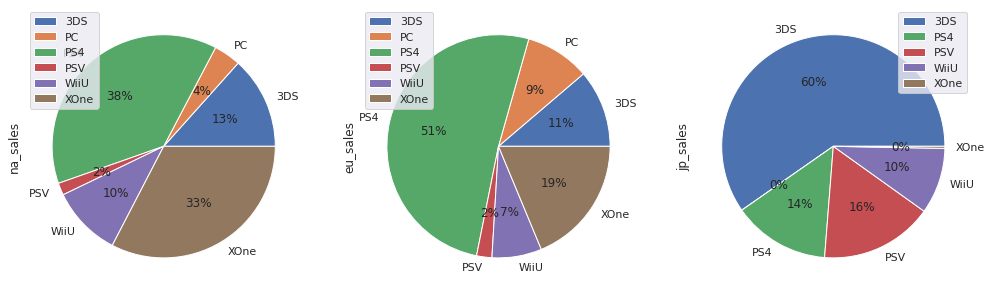

In [32]:
# Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы

df_actual.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().plot(
    kind="pie",autopct='%.0f%%', subplots=True)

Из группы графиков хорошо видно, что у каждого региона свои предпочтения в вопросе выбора платформ:
- В Северной Америке короли рынка PS4 и XOne c 38 и 33 процетами продаж игр. На двоих это получается 71% от доли продаж, весьма не плохо. Следующая группа приставок с долями 13% и 10% - 3DS и WiiU. Замыкают градацию рынка игровые платформы PC (4%) и PSV (2%). 
- В Европе более половины продаж приходится на игры для PS4, целых 51%. Второе место у XOne с 19%, третье - у 3DS с 11%. 
- Очень впечатляет распределение продаж по японскому рынку. Так на долю платформа 3DS приходится целых 60% продаж, доля PS4-14% продаж, PSV - 16% . 10% продаж приходится на WiiU. Практически не представлены такие платформы, как  PC и XOne, реализация игр на японском рынке по ним стремится к 0.

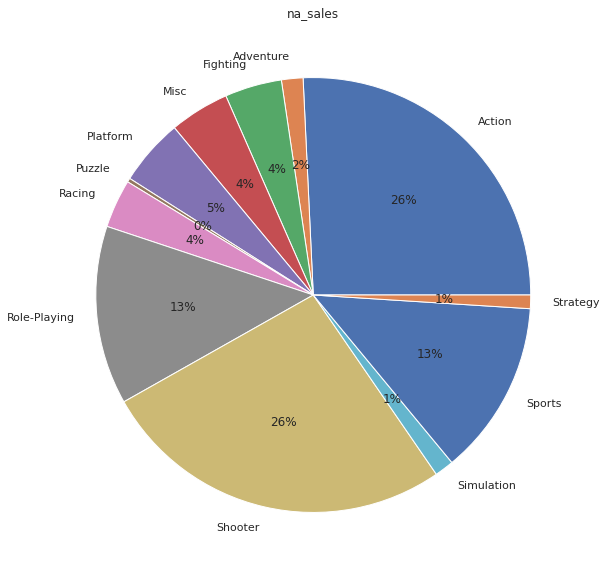

In [33]:
# Определим самые популярные жанры.

df_actual.groupby('genre')['na_sales'].sum().plot(
    kind="pie",autopct='%.0f%%', title = 'na_sales', label ='')
plt.show()

Большое число жанров не хорошо отображается на графике, необходимо произвести группировку малопопулярных жанров на каждом рынке, выделить топ-5, а остальные жанры сгруппировать в отдельную группу ПРОЧИЕ

In [34]:
# группируем по жанрам каждый рынок
na_genre_list = df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).index
jp_genre_list = df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).index
eu_genre_list = df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).index


# Код ниже не актуален

# def na_grouped (row):
#     genre = row['genre']
#     if genre in na_genre_list:
#         return genre
#     return 'other'
# df_actual['na_genre'] = df_actual.apply(na_grouped, axis=1)
# 
# def jp_grouped (row):
#     genre = row['genre']
#     if genre in jp_genre_list:
#         return genre
#     return 'other'
# df_actual['jp_genre'] = df_actual.apply(jp_grouped, axis=1)
# 
# def eu_grouped (row):
#     genre = row['genre']
#     if genre in eu_genre_list:
#         return genre
#     return 'other'
# df_actual['eu_genre'] = df_actual.apply(eu_grouped, axis=1)
# 
# df_actual.sample(5)

In [35]:
def grouped (row, market):
    genre = row['genre']
    if genre in market:
        return genre
    return 'other'


df_actual['na_genre'] = df_actual.apply(grouped, market = na_genre_list, axis=1)
df_actual['jp_genre'] = df_actual.apply(grouped, market = jp_genre_list, axis=1)
df_actual['eu_genre'] = df_actual.apply(grouped, market = eu_genre_list, axis=1)

#df_actual.sample(5)

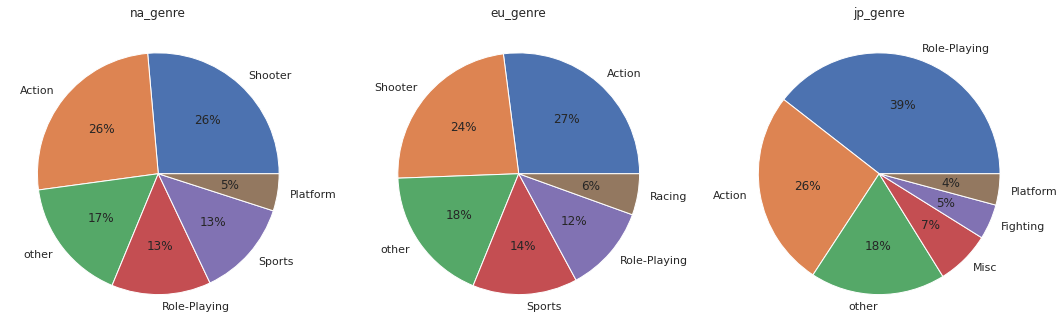

In [38]:

genre_list = ['na_genre', 'eu_genre', 'jp_genre']
sale_list = ['na_sales','eu_sales','jp_sales']

fig, axs = plt.subplots(1, 3, figsize=(15,15))
axs = axs.ravel()

for idx,ax in enumerate(axs):
    df_x = (df_actual.groupby(genre_list[idx])[sale_list[idx]].sum().
         reset_index().
         sort_values(sale_list[idx], ascending = False, ignore_index = True))

    ax.pie(x = df_x[sale_list[idx]], autopct='%.0f%%', labels=df_x[genre_list[idx]])
    ax.set_title(genre_list[idx])
plt.tight_layout()

Хорошо видно, что конъюнктура жанров на разных рынках не совпадает.

- Рынки Северной Америки и Европы весьма похожи, с той лишь разницей, что в топ-5 имеется расхождение в один жанр. В Северной Америке в топ-5 представлены платформеры (5% от доли рынка), а в Европе гонки - 6% от доли рынка. 

- Топ-3 жанров в Европе представлен жанрами Action - 27%, Shooter - 24%, Sport - 14%.

- Топ-3 жанров в Северной Америке представлены жанрами Action- 26%, Shooter - 26%, Role-Playing/Sport - по 13% каждый.

- Предпочтения по жанрам в Японии совсем не похожа на рынке NA и EU. Почти 40% рынка занимает продажа Role-Playing игр, 26% у Action. 7% у музыкальных игр, 5% у файтингов, 4% у платформеров. Музыкальные игры и файтинги вообще не попали в категорию предпочитаемых на рынках NA и EU.  Что и говорить, Япония это совсем другая культура, другой менталитет у людей и совсем другие предпочтения в видеоиграх по сравнению с нами

- На прочие жанры вне топ-5 на каждом рынке приходится примерно одинаковая доля игр. 


rating      sum                                    mean            \
           eu_sales jp_sales na_sales other_sales  eu_sales  jp_sales   
0        E    59.67    13.81    54.10       15.07  0.277535  0.064233   
1     E10+    27.80     5.86    33.42        8.03  0.148663  0.031337   
2        M   103.68     8.77   104.93       31.58  0.345600  0.029233   
3        T    34.28    15.03    37.16       11.14  0.126494  0.055461   
4  unknown    50.00    70.11    55.89       14.06  0.078864  0.110584   

                         
   na_sales other_sales  
0  0.251628    0.070093  
1  0.178717    0.042941  
2  0.349767    0.105267  
3  0.137122    0.041107  
4  0.088155    0.022177

<AxesSubplot:title={'center':'Влияние рейтинга ESRB на продажи в отдельных регионах'}, xlabel='rating'>

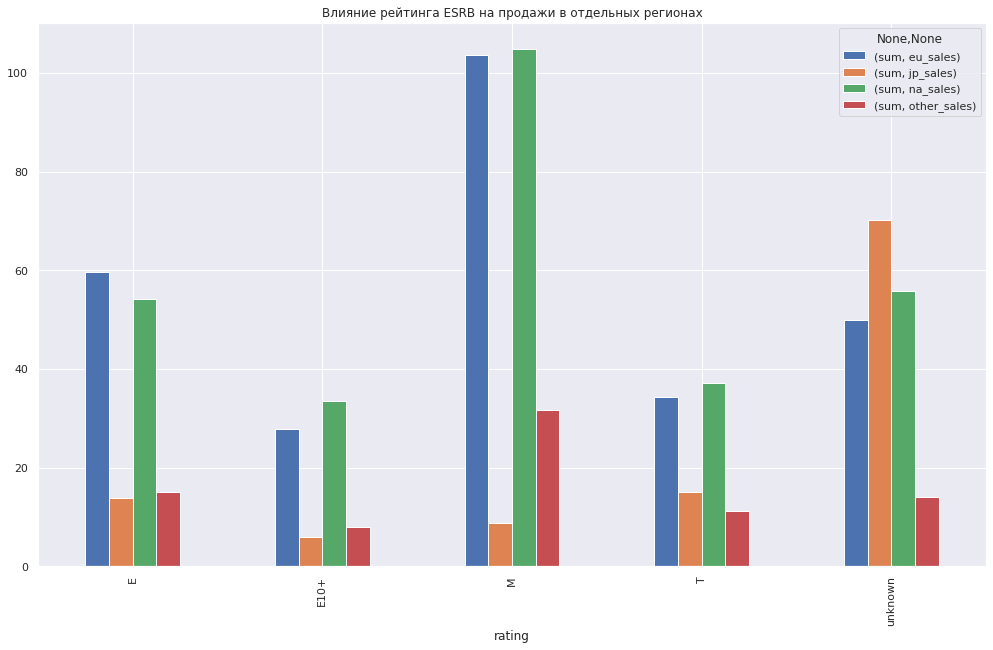

In [39]:
# Рассмотрим влияние рейтинга ESRB на продажи в отдельных регионах
display(df_actual.pivot_table(index='rating', values = ['na_sales','jp_sales','eu_sales','other_sales']
                              , aggfunc=['sum', 'mean']).reset_index())

print()
print()

df_actual.pivot_table(index='rating', values = ['na_sales','jp_sales','eu_sales','other_sales'], 
                      aggfunc=['sum']).plot(kind='bar', title = 'Влияние рейтинга ESRB на продажи в отдельных регионах',
                                            legend = True)


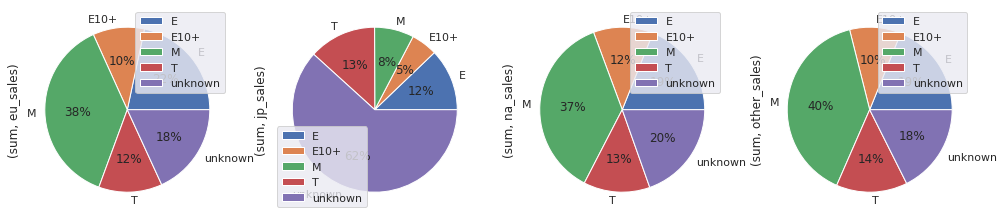

In [40]:
df_actual.pivot_table(index='rating', 
                      values = ['na_sales','jp_sales','eu_sales','other_sales'], 
                      aggfunc=['sum']).plot(kind="pie",
                                            autopct='%.0f%%',
                                            subplots=True);

В рейтинг попали игры 4 возрастных рейтингов по системе ESRB:

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера

- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.

- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

Все остальные игры, рейтинг которых по системе ESRB был не определен, были сгруппированы в группу unknown.

Первое, что бросается в глаза - рейтинг ESRB имеет максимальное влияние на продажи в регионах NA и EU, а вот доли на японском и прочих рынках находится на минимуме. Это связано с тем фактом, что в Японии имеется своя рейтинговая система оценок (Спасибо, википедия!=))

Сравнивая предпочтения по рейтингам ESRB, то видно, что потребители больше всего предпочитают выбирать с рейтингом "Для взрослых", на втором месте "Для всех". А вот игры в компромисных категориях "Для всех от 10 лет и старше" и "Подросткам" имеют значительно меньшую популярность. Хотя, возможно, это связано с тем фактом, что сами игры получают данные рейтинги намного реже, в связи с чем они меньше предствалены на рынке видеоигр.


### Вывод

Резюмируя данный блок исследования, хочется сказать, что предпочтения пользователей в каждом регионе по своему уникальны. Данное утверждение касается и предпочитаемых платформ и распределения игр по жанрам по регионам, так и влияния рейтинговой системы ESRB.

Самое распостраненные платформы на рынке Северной Америки - S4 и XOne c 38 и 33 процетами продаж игр, жанры - Шутеры и Экшены (по 26% от общей доли продаж игр)

На рынке Европы беззаговорочный лидер среди платформ PS4 с долей рынка в целых 51%, а самые популярные жанры - Шутеры и Экшены, здесь есть сходство с рынком NA. 

Рассматривая результаты рынка Японии, так и хочется воскликнуть: "Вау, на сколько мы не похоже на них!" Предпочтения по жанрам в Японии совсем не похожы на рынки NA и EU. Почти 40% рынка занимает продажа Role-Playing игр, 26% у Action. 7% у музыкальных игр, 5% у файтингов, 4% у платформеров. Музыкальные игры и файтинги вообще не попали в категорию предпочитаемых на рынках NA и EU.С предпочтениями по платформам тоже практически шоковые отличия от рынков NA и EU. Так на долю платформа 3DS приходится целых 60% продаж, доля PS4-14% продаж, PSV - 16% . 10% продаж приходится на WiiU. Практически не представлены такие платформы, как PC и XOne, реализация игр на японском рынке по ним стремится к 0.

Рейтинг ESRB имеет максимальное влияние на продажи в регионах NA и EU, а вот доли на японском и прочих рынках находится на минимуме. Это связано с тем фактом, что в Японии имеется своя рейтинговая система оценок.

Сравнивая предпочтения по рейтингам ESRB, то видно, что потребители больше всего предпочитают выбирать с рейтингом "Для взрослых", на втором месте "Для всех". А вот игры в компромисных категориях "Для всех от 10 лет и старше" и "Подросткам" имеют значительно меньшую популярность. Хотя, возможно, это связано с тем фактом, что сами игры получают данные рейтинги намного реже, в связи с чем они меньше предствалены на рынке видеоигр.


## Проверка гипотез

Итак, сформируем гипотезы для проверки.

1) Нулевая гипотеза Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза Н1: Средние пользовательские рейтинги платформ Xbox One и PC не равны между собой.

2) Нулевая гипотеза Н0: Средние пользовательские рейтинги жанров Action равна среднему пользовательскому рейтингу жанра Sports  Альтернативная гипотеза Н1: Средние пользовательские рейтинги жанров Action и Sports не равны между собой.

Пороговое значение уровня значимости при проверки двух гипотез пример равной 5%.

In [41]:
# Проверка первой гипотезы:
df_actual_xbox = df_score_analysis.query('platform == "XOne"')['user_score']
df_actual_pc = df_score_analysis.query('platform == "PC"')['user_score']

alpha = .05 # критический уровень статистической значимости

lv = st.levene(df_actual_xbox, df_actual_pc)
if lv.pvalue > alpha:
    param = True
    print('Обе выборки имеют схожие дисперсии')
else:
    print('Дисперсии выборок различны. Будем использовать equal_var = False')
    param = False

results = st.ttest_ind(df_actual_xbox,df_actual_pc, equal_var = param)

print("Значение среднего пользовательского рейтинга для платформы XOne в актуальном периоде равно:", df_actual_xbox.mean())
print("Значение среднего пользовательского рейтинга для платформы PC в актуальном периоде равно:",df_actual_pc.mean())
print()
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Дисперсии выборок различны. Будем использовать equal_var = False
Значение среднего пользовательского рейтинга для платформы XOne в актуальном периоде равно: 6.561734693877551
Значение среднего пользовательского рейтинга для платформы PC в актуальном периоде равно: 6.232051282051282

p-значение:  0.05830078208762808
Не получилось отвергнуть нулевую гипотезу


In [42]:
# Проверка второй гипотезы:
df_actual_action = df_score_analysis.query('genre == "Action"')['user_score']
df_actual_sports = df_score_analysis.query('genre == "Sports"')['user_score']

alpha = .05 # критический уровень статистической значимости

lv = st.levene(df_actual_action, df_actual_sports)
if lv.pvalue > alpha:
    param = True
    print('Обе выборки имеют схожие дисперсии')
else:
    print('Дисперсии выборок различны. Будем использовать equal_var = False')
    param = False

results = st.ttest_ind(df_actual_action,df_actual_sports, equal_var = param)

print('Значение среднего пользовательского рейтинга для игр в жанре "Action" в актуальном периоде равно:', df_actual_action.mean())
print('Значение среднего пользовательского рейтинга для игр в жанре "Sports" в актуальном периоде равно:', df_actual_sports.mean())
print()
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Обе выборки имеют схожие дисперсии
Значение среднего пользовательского рейтинга для игр в жанре "Action" в актуальном периоде равно: 6.90031746031746
Значение среднего пользовательского рейтинга для игр в жанре "Sports" в актуальном периоде равно: 5.582692307692308

p-значение:  3.559479045129496e-15
Отвергаем нулевую гипотезу


### Вывод

**Вывод_v2:**

Проведя анализ выдвинутых статистических гипотез, можно сделать соответсвующее вывод:
- Согласно представленной выборки данных, в актуальном периоде анализа нет нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются; 
- В тоже время,  средние пользовательские рейтинги жанров Action и Sports в представленной выборке в актуальном периоде значимо различны

## Общий вывод

К анализу был предствален исходный датасет, содержащий в себе информацию о продаже **16713** игр на разных платформах, при этом только в датасете содержалось **11559** уникальных игровых тайтлов, то есть **30,8% нашего датасета - переиздание одних и тех же игр в разные года и на разных платформах.** К примеру, игра **Need for Speed: Most Wanted** была издана на 12 платформах, это рекорд.

Всего в датасете содержится информация о продаже игр на 31 игровой платформы, причем самая распространенная из всех - PS2, на ней было издано 2161 игра или почти 13% от нашего датасета.


Общая сумма продаж игр в нашем датасете по всем регионам составила **8915.71** млн. экземпляров. Впечатляет!

Проведенный *исследовательский анализ данных* рассказал нам о многом.
    
1. - Индустрия компьютерных игр медленно неспеша развивалась в  в период с 1980 по 1990 гг., когда в год выходило минимальное по современны мерком игр и количество платформ было не большим.

   - Начиная с 1994-95 гг. начинается постепенный рост числа выпускаемых игр, на рынке появлется больше платформ. Такая ситуация продлится влоть до 2001-2002 годов.

   - Расцвет платформенных игр пришелся на  2008 - 2009 годы: в этот период индустрия игр выпусткала около 1450 игр ежегодно.

   - Начиная с  2010 года наблюдалось снижение числа выпускаемых игр и их продаж, которое сохраняется и по сей день.

   - Сделаю предположение, что начиная с 2010 года потребители постепенно начали отказываться от компьютерных игр в пользу других платформ, данным по которым у нас нет, например в пользу мобильных игр.


2. Платформа-рекордсмен по сумме проданных копий игр - PS2, 1255,77 млн копий. В топе по продажам из 6 представленных консолей 3 произведены компанией Sony, 2 - компанией Nintendo и 1 от компании Microsoft.


**3. Период расцвета и падения каждой из платформ умещается в период 5-7 лет. Во многом это объясняется сменяемостью поколений платформ, без данного фактора возможно платформа могла просуществовать больший срок.**


4. По состоянию на 2016 год (даже не смотря на не полность данных по нему) на рынке представлены только 9 платформ из 31. 
Сумма продаж игр в 2016 году по платформам предыдущего покаления  - PS3, Wii, X360 - сильно снизилась по сравнению с предыщими годами. При наличии на рынке nextgen данных платформ  целесообразно не принимать предыдущие покаления приставок к дальнейшему  анализу. 


**5. Таким образом, исходя из вышеизложенного было принято решение принять для дальнейшего анализа период с 2013 по 2016 год и платформы `3DS`,	`PC`,	`PS4`,	`PSV`,	`WiiU`,	`XOne`.**


6. Результаты средней продажи игр по данным платформам очень похожи, но все равно можно сгрупировать платформы PS4, XOne, WiiU как более коммерчески успешные. В среднем по данным платформам игры реализоваывались в диапазоне от 0,1 млн. до 1,5 проданных копий. Среднестатистическая игра на данных платформах продавалась в объеме +/- 0,25 млн. проданных копий. 

   Чуть хуже ситуация с продажами игр на платформах 3DS и PC. В среднем игры на данных платформах продавались с результатом в 0,125 млн. копий игры. Максимальное значение статистически значимой выборки у 3DS по сравнению с PC чуть выше. 

   Минимальные размеры продаж и игр платформы PSV. В среднем, по данной платформе лучшие результаты продаж игр находятся на отметке в 0,25 млн. проданных копий, ну а в среднем продается 0,1 млн. копия игр.

   Ни одна из представленных платформ-лидеров не показала существенного отрыва в средней продаже игр, т.е. какой-то супер-фоворит с реализацией игр на уровне 2 млн.+ копий проданных игр в среднем отсутствует, все более-менее ровно. 

   У каждой платформы есть так называемые бестселлеры - игры, результаты продаж которых намного превышают остальные игры в десятки и даже сотни раз доходят 15+ проданных копий игры, такие случаи зафиксированы у платформ PS4 и 3DS. Но как правило даже у бестселлеров есть свои правила - как правило продажа игр-бестселлеров на платформе PS4 останавливалась на уровне 4 млн. проданных копий, у  3DS - 2,5 млн проданных копий, XOne - 3,6 млн. копий. По остальным платформам "выбросы" в продаже игр имеют более разовый характер.


7. Оценки пользователей практически не имели влияния (а даже и незначительное отрицательное влияние) на общие продажи игр, когда в тоже время оценки критиков оказывали бОльшее по сравнению с оценками пользователей влияние на продажи игры. Но и все равно, даже оценки критиков имели слабую корреляцию с общим результатом.


8. Самые популярные с точки зрения средних объемов продаж на 1 выпущенную игру:
   1. Шутеры
   2. Спорт
   3. Платформеры
   4. Фатинги
   5. Ролевые игры
    
   Жанры с самыми низкими продажами на 1 игру стали игры-пазлы, стратегии и приключения 
   
   
   
   
   
*Исследования портрета пользователя каждого региона* показали, что предпочтения пользователей в каждом регионе по своему уникальны. Данное утверждение касается и предпочитаемых платформ и распределения игр по жанрам по регионам, так и влияния рейтинговой системы ESRB.

Самое распостраненные платформы на рынке Северной Америки - S4 и XOne c 38 и 33 процетами продаж игр, жанры - Шутеры и Экшены (по 26% от общей доли продаж игр)

На рынке Европы беззаговорочный лидер среди платформ PS4 с долей рынка в целых 51%, а самые популярные жанры - Шутеры и Экшены, здесь есть сходство с рынком NA. 

Рассматривая результаты рынка Японии, так и хочется воскликнуть: "Вау, на сколько мы не похоже на них!" Предпочтения по жанрам в Японии совсем не похожы на рынки NA и EU. Почти 40% рынка занимает продажа Role-Playing игр, 26% у Action. 7% у музыкальных игр, 5% у файтингов, 4% у платформеров. Музыкальные игры и файтинги вообще не попали в категорию предпочитаемых на рынках NA и EU.С предпочтениями по платформам тоже практически шоковые отличия от рынков NA и EU. Так на долю платформа 3DS приходится целых 60% продаж, доля PS4-14% продаж, PSV - 16% . 10% продаж приходится на WiiU. Практически не представлены такие платформы, как PC и XOne, реализация игр на японском рынке по ним стремится к 0.

Рейтинг ESRB имеет максимальное влияние на продажи в регионах NA и EU, а вот доли на японском и прочих рынках находится на минимуме. Это связано с тем фактом, что в Японии имеется своя рейтинговая система оценок.

Сравнивая предпочтения по рейтингам ESRB, то видно, что потребители больше всего предпочитают выбирать с рейтингом "Для взрослых", на втором месте "Для всех". А вот игры в компромисных категориях "Для всех от 10 лет и старше" и "Подросткам" имеют значительно меньшую популярность. Хотя, возможно, это связано с тем фактом, что сами игры получают данные рейтинги намного реже, в связи с чем они меньше предствалены на рынке видеоигр.


*Анализ выдвинутых статистических гипотез* показал:

- Согласно представленной выборки данных, в актуальном периоде анализа нет нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются; 
- В тоже время,  средние пользовательские рейтинги жанров Action и Sports в представленной выборке в актуальном периоде значимо различны